In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import imageio
import io
from scipy import misc

# Breast Cancer Set

In [2]:
data = pd.read_csv('data/breast-w.csv', na_values='?')
data = data.dropna()

In [3]:
data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [4]:
data.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
data.info()
data = data.replace({"malignant":1,"benign":0})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
Clump_Thickness          683 non-null int64
Cell_Size_Uniformity     683 non-null int64
Cell_Shape_Uniformity    683 non-null int64
Marginal_Adhesion        683 non-null int64
Single_Epi_Cell_Size     683 non-null int64
Bare_Nuclei              683 non-null float64
Bland_Chromatin          683 non-null int64
Normal_Nucleoli          683 non-null int64
Mitoses                  683 non-null int64
Class                    683 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 58.7+ KB


In [6]:
#print("Training size: {}; Test size: {}".format(len(train), len(test)))

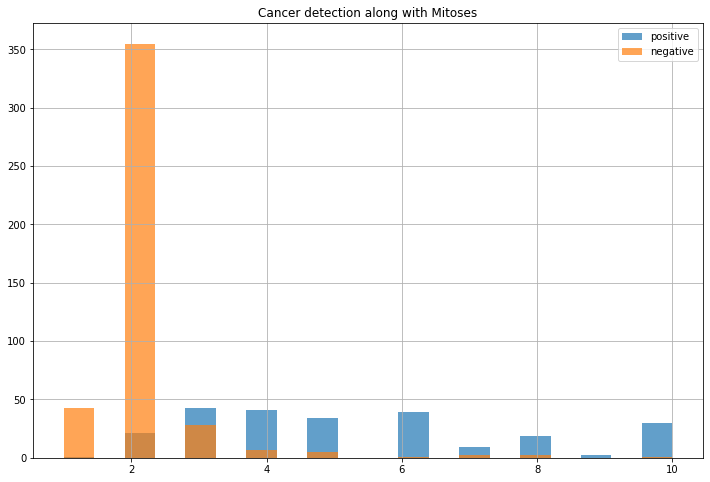

In [7]:
pos_tar = data[data['Class'] == 1]['Single_Epi_Cell_Size'] 
neg_tar = data[data['Class'] == 0]['Single_Epi_Cell_Size'] 

fig = plt.figure(figsize=(12,8))
plt.title("Cancer detection along with Mitoses")
pos_tar.hist(alpha = 0.7, bins = 20, label = 'positive')
neg_tar.hist(alpha = 0.7, bins = 20, label = 'negative')
plt.legend(loc = "upper right")

In [8]:
model = DecisionTreeClassifier(criterion= 'entropy')
max_depth_model = DecisionTreeClassifier(criterion= 'entropy', max_depth = 1)

In [9]:
features = ["Clump_Thickness", "Cell_Size_Uniformity","Cell_Shape_Uniformity","Marginal_Adhesion", "Single_Epi_Cell_Size","Bare_Nuclei","Bland_Chromatin", "Normal_Nucleoli", "Mitoses"]

In [10]:
X_train = data[features]
y_train = data["Class"]

In [11]:
dt = model.fit(X_train,y_train)
dt_max_depth = max_depth_model.fit(X_train,y_train)

In [12]:
def show_tree(tree, feature, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

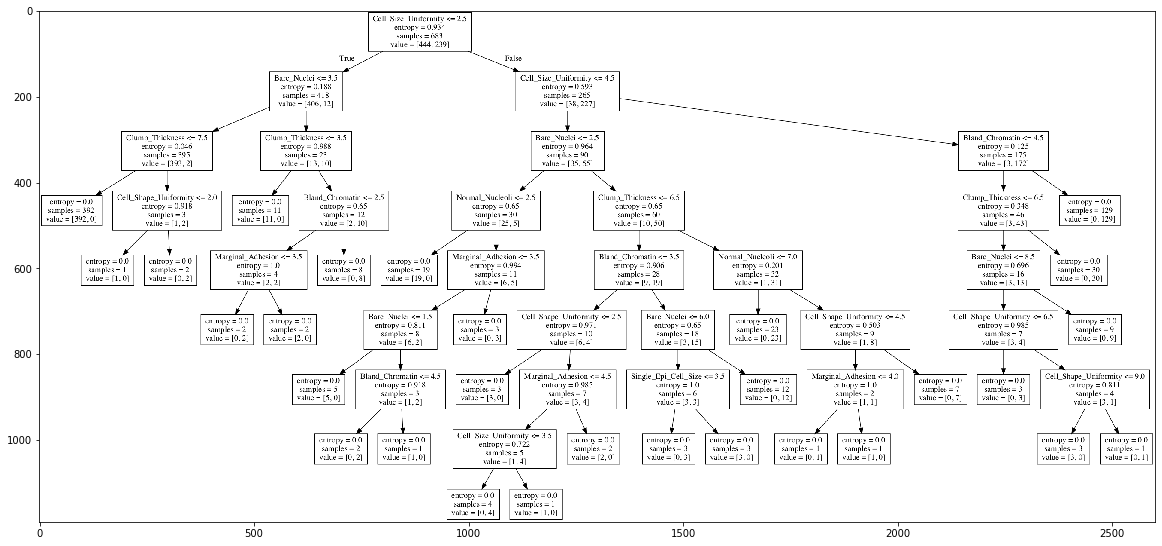

In [13]:
show_tree(dt, features, 'dec_tree_01.png')

In [14]:
#y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
train_score = np.mean(scores['train_score'])
test_score = np.mean(scores['test_score'])
print("Accuracy using 10-cross (train)Validation:  " ,train_score , "%")
print("Accuracy using 10-cross (test)Validation:  " ,test_score , "%")

Accuracy using 10-cross (train)Validation:   1.0 %
Accuracy using 10-cross (test)Validation:   0.9474618595004516 %


In [15]:
from sklearn.metrics import accuracy_score
#score = accuracy_score(y_test, y_pred) * 100
#score_train = accuracy_score(y_train, y_train_pred) * 100

#fig = plt.figure(figsize=(12,8))
#plt.title("Accuracy Check")
#zez.hist(alpha = 0.7, bins = 30, label = 'yprediction')
#scores.hist(alpha = 0.7, bins = 30, label = 'cross_validation')
#plt.legend(loc = "upper right")

In [16]:
#print("Accuracy test set: " ,round(score, 1), "%")
#print("Accuracy train set: " ,round(score_train, 1), "%")

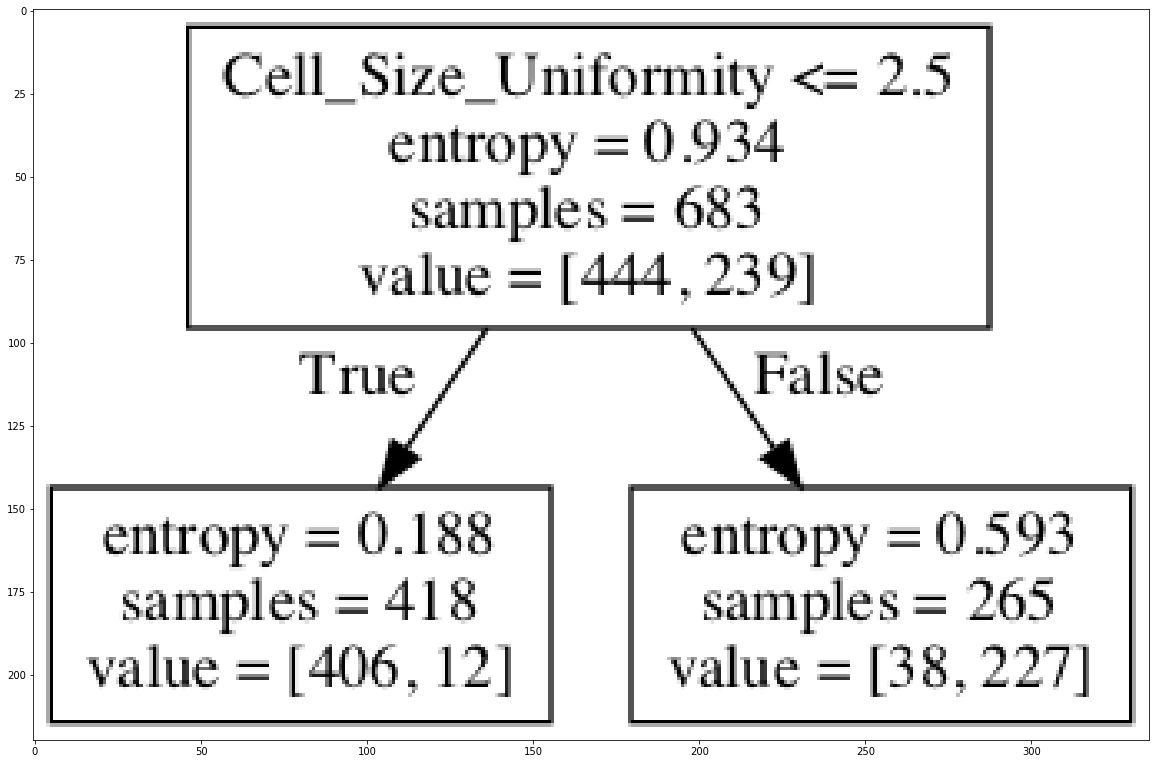

In [17]:
show_tree(dt_max_depth,features, 'dec_tree_02.png')

In [18]:
##y_pred_max_depth =  max_depth_model.predict(X_test)
##y_predtest_max_depth =  max_depth_model.predict(X_train)
#Calculate the accuracy using CV = 10
scores_md = cross_validate(max_depth_model, X_train, y_train, cv=10, return_train_score=True)
train_score_md = np.mean(scores_md['train_score'])
test_score_md = np.mean(scores_md['test_score'])
print("Accuracy using 10-cross (train)Validation:  " ,train_score_md , "%")
print("Accuracy using 10-cross (test)Validation:  " ,test_score_md , "%")

Accuracy using 10-cross (train)Validation:   0.9277717338406937 %
Accuracy using 10-cross (test)Validation:   0.9093124530798692 %


In [19]:
#score_max_depth = accuracy_score(y_test, y_pred_max_depth) * 100
#score_maxtest_depth = accuracy_score(y_train, y_predtest_max_depth) * 100

In [20]:
#print("Accuracy test max depth: " ,round(score_max_depth, 1), "%")
#print("Accuracy train max depth: " ,round(score_maxtest_depth, 1), "%")


# Diabetes

In [21]:
db = pd.read_csv('data/diabetes.csv')

In [22]:
db = db.replace({"tested_positive":1,"tested_negative":0})
db.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
db.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
model_db = DecisionTreeClassifier(criterion= 'entropy')
model_db_max_depth = DecisionTreeClassifier(criterion= 'entropy', max_depth = 1)

In [25]:
feat_db = ["preg","plas","pres","skin","insu","mass","pedi","age"]

In [26]:
X_train_db = db[feat_db]
y_train_db = db["class"]

In [27]:
dt_db = model_db.fit(X_train_db,y_train_db)
dt_max_depth_db = model_db_max_depth.fit(X_train_db,y_train_db)

In [28]:
def show_tree_db(tree, feature, path):
    fd = io.StringIO()
    export_graphviz(tree, out_file = fd, feature_names = feat_db)
    pydotplus.graph_from_dot_data(fd.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

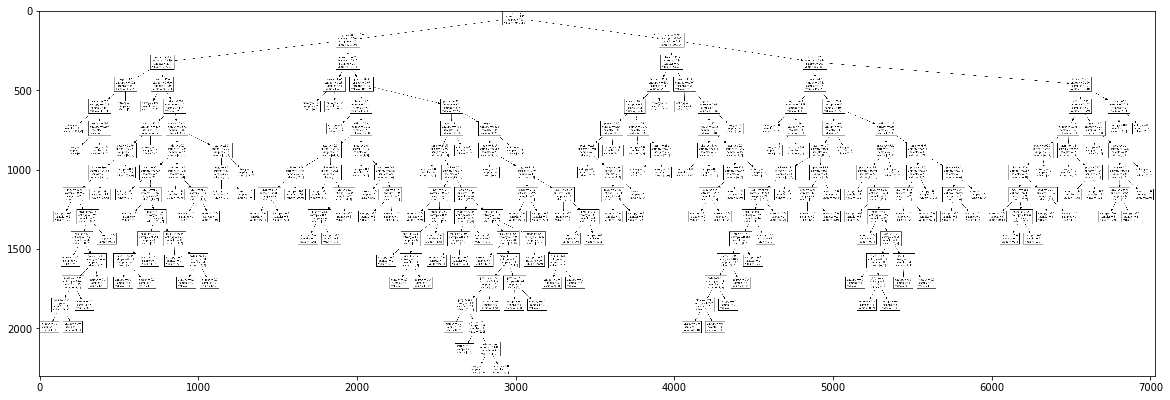

In [29]:
show_tree_db(dt_db,feat_db, 'dec_tree_03.png')

In [30]:
#y_pred_db = dt_db.predict(X_test_db)
#y_train_pred_db = dt_db.predict(X_train_db)

In [31]:
#score_db = accuracy_score(y_test_db, y_pred_db) * 100
#score_train_db = accuracy_score(y_train_db, y_train_pred_db) * 100

scores_db = cross_validate(model_db, X_train_db, y_train_db, cv=10, return_train_score=True)
train_score_db = np.mean(scores_db['train_score'])
test_score_db = np.mean(scores_db['test_score'])
print("Accuracy using 10-cross (train)Validation:  " ,train_score_db , "%")
print("Accuracy using 10-cross (test)Validation:  " ,test_score_db , "%")

Accuracy using 10-cross (train)Validation:   1.0 %
Accuracy using 10-cross (test)Validation:   0.6952836637047163 %


In [32]:
#print("Accuracy test set diabetes: " ,round(score_db, 1), "%")
#print("Accuracy train set diabetes: " ,round(score_train_db, 1), "%")

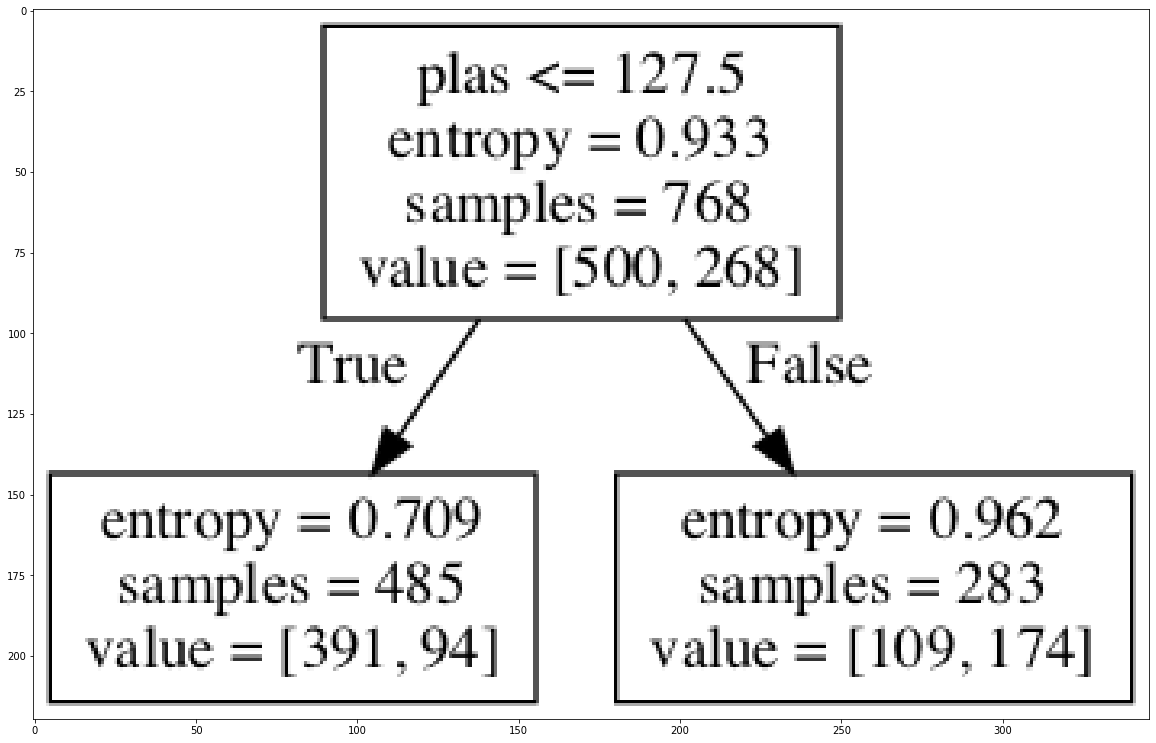

In [33]:
show_tree_db(dt_max_depth_db,feat_db, 'dec_tree_04.png')

In [34]:
#y_pred_max_depth_db =  dt_max_depth_db.predict(X_test_db)
#y_predtest_max_depth_db =  dt_max_depth_db.predict(X_train_db)

In [35]:
##score_max_depth_db = accuracy_score(y_test_db, y_pred_max_depth_db) * 100
##score_maxtest_depth_db = accuracy_score(y_train_db, y_predtest_max_depth_db) * 100

scores_db_md = cross_validate(model_db_max_depth, X_train_db, y_train_db, cv=10, return_train_score=True)
train_score_db_md = np.mean(scores_db_md['train_score'])
test_score_db_md = np.mean(scores_db_md['test_score'])
print("Accuracy using 10-cross (train)Validation:  " ,train_score_db_md , "%")
print("Accuracy using 10-cross (test)Validation:  " ,test_score_db_md , "%")

Accuracy using 10-cross (train)Validation:   0.7358241385944806 %
Accuracy using 10-cross (test)Validation:   0.7149008885850991 %


In [36]:
#print("Accuracy test set max depth diabetes: " ,round(score_max_depth_db, 1), "%")
#print("Accuracy train set max depth diabetes: " ,round(score_maxtest_depth_db, 1), "%")

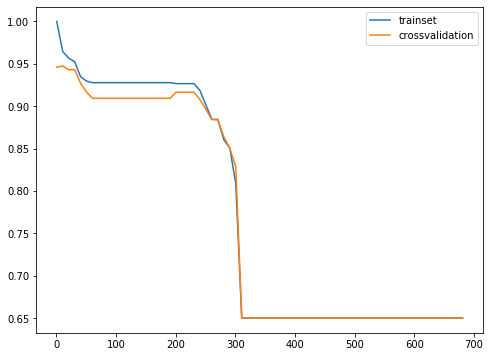

In [37]:
# create 3 empty arrays to store {the train set, the test-validation set, the count of min_sample_leaf}
train_set = list()
cross_val = list()
mincount = list()

# iterate through the elements of the dataset
for min_sample_leaf in range(1, data.shape[0], 10):
    
    # implement the model and fit it to our data
    model_ml = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= min_sample_leaf)
    scores = cross_validate(model_ml, X_train, y_train, cv=10, return_train_score=True)
    
    # get the accuracy of the scores
    train_score = np.mean(scores['train_score'])
    test_score = np.mean(scores['test_score'])
    
    #add it to the array
    cross_val.append(test_score)
    train_set.append(train_score)
    mincount.append(min_sample_leaf)

plt.figure(figsize=(8, 6))
plt.plot(mincount, train_set,label = 'trainset')
plt.plot(mincount, cross_val,label = 'crossvalidation')
plt.legend()
plt.show() 


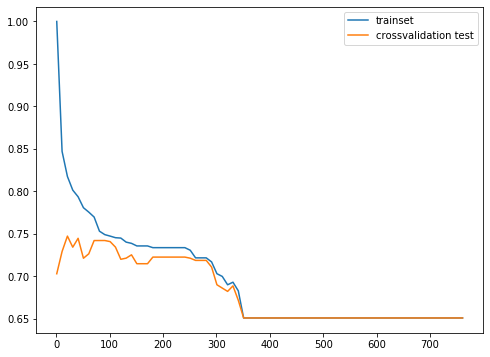

In [38]:
train_set_db = list()
cross_val_db = list()
mincount_db = list()
for min_sample_leaf_db in range(1, db.shape[0], 10):
    
    model_ml_db = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= min_sample_leaf_db)
    scores_db = cross_validate(model_ml_db, X_train_db, y_train_db, cv=10, return_train_score=True)
    
    train_score_db = np.mean(scores_db['train_score'])
    test_score_db = np.mean(scores_db['test_score'])
    
    cross_val_db.append(test_score_db)
    train_set_db.append(train_score_db)
    mincount_db.append(min_sample_leaf_db)

plt.figure(figsize=(8, 6))
plt.plot(mincount_db, train_set_db,label = 'trainset')
plt.plot(mincount_db, cross_val_db,label = 'crossvalidation test')
plt.legend()
plt.show() 